In [3]:
def plot_residuals(model):
	fitted = model.fittedvalues
	residuals = model.resid
	standardized_residuals = model.get_influence().resid_studentized_internal

	# Standardized Residuals Plot
	plt.figure(figsize = (8, 6))
	plt.scatter(fitted, standardized_residuals, color = "#1f2db0")
	plt.axhline(0, color = 'red', linestyle = '-')
	plt.axhline(2, color = 'green', linestyle = '--')
	plt.axhline(-2, color = 'green', linestyle = '--')
	plt.xlabel("Predicted y values")
	plt.ylabel("Standardied Residuals")
	plt.title('Standardized Residual Plot')



回歸分析結果摘要：
                                OLS Regression Results                                
Dep. Variable:     flattened_total_box_office   R-squared:                       0.556
Model:                                    OLS   Adj. R-squared:                  0.556
Method:                         Least Squares   F-statistic:                     4405.
Date:                        Sat, 07 Jun 2025   Prob (F-statistic):               0.00
Time:                                23:01:36   Log-Likelihood:                -6125.7
No. Observations:                        3521   AIC:                         1.226e+04
Df Residuals:                            3519   BIC:                         1.227e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

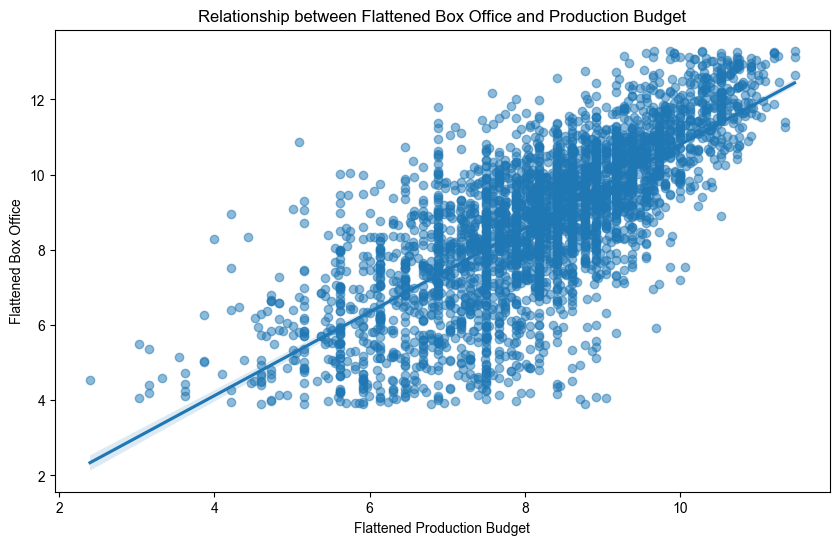

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from scipy import stats
import seaborn as sns
import math

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 設定支援中文的字型
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

df = pd.read_csv("movie_summary.csv")

filtered_df = df[
    (df['production_budget'] != 0) &
    (df['production_year'] > 2000) &
    df['genre'].notna() &
    df['domestic_box_office'].notna() &
    df['international_box_office'].notna()
].copy()

filtered_df["total_box_office"] = filtered_df["domestic_box_office"] + filtered_df["international_box_office"]
filtered_df["flattened_production_budget"] = np.pow(filtered_df["production_budget"], 1/8)
filtered_df["flattened_total_box_office"] = np.pow(filtered_df["total_box_office"], 1/8)

filtered_df['z_score'] = stats.zscore(filtered_df['flattened_total_box_office'])
filtered_df = filtered_df[filtered_df['z_score'].abs() <= 2].copy()

# 執行回歸分析
model = sm.ols('flattened_total_box_office ~ flattened_production_budget', data=filtered_df).fit()

# 印出回歸結果摘要
print("\n回歸分析結果摘要：")
print(model.summary())

# 繪製散點圖和回歸線
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_df, x='flattened_production_budget', y='flattened_total_box_office', scatter_kws={'alpha':0.5})
plt.title('Relationship between Flattened Box Office and Production Budget')
plt.xlabel('Flattened Production Budget')
plt.ylabel('Flattened Box Office')
# 畫出來
plt.show()

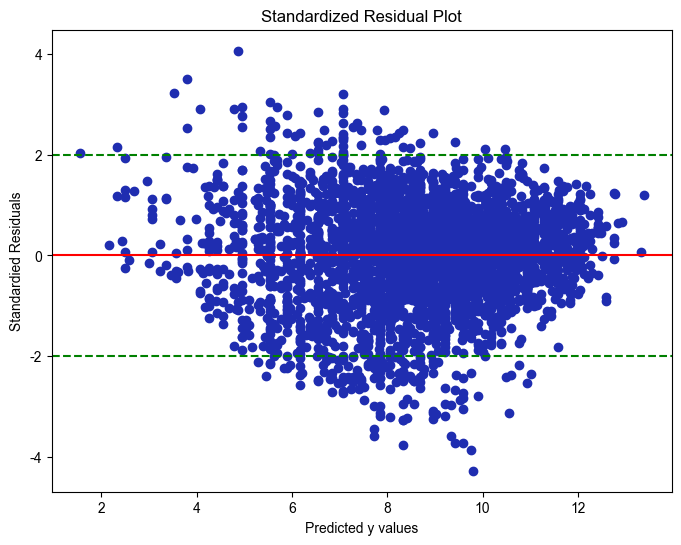

In [5]:
plot_residuals(model)

                                OLS Regression Results                                
Dep. Variable:     flattened_total_box_office   R-squared:                       0.747
Model:                                    OLS   Adj. R-squared:                  0.747
Method:                         Least Squares   F-statistic:                     8475.
Date:                        Sat, 07 Jun 2025   Prob (F-statistic):               0.00
Time:                                23:05:12   Log-Likelihood:                -3746.9
No. Observations:                        2876   AIC:                             7498.
Df Residuals:                            2874   BIC:                             7510.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

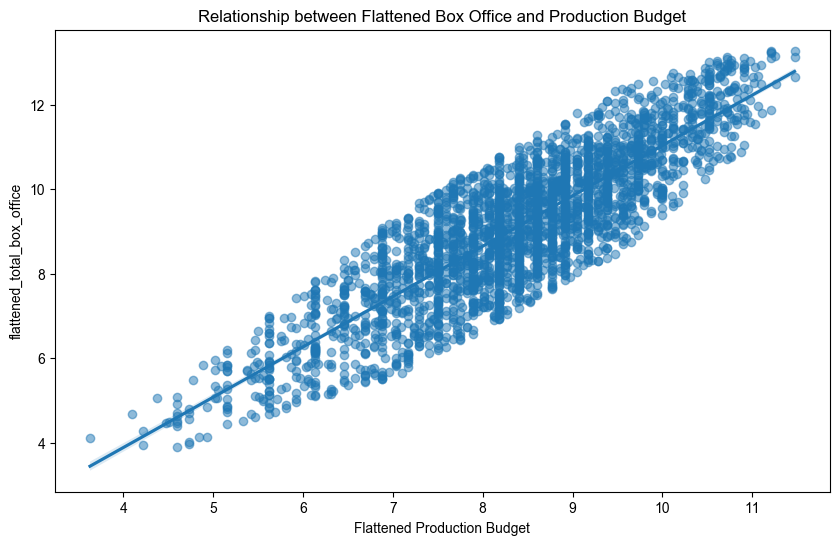

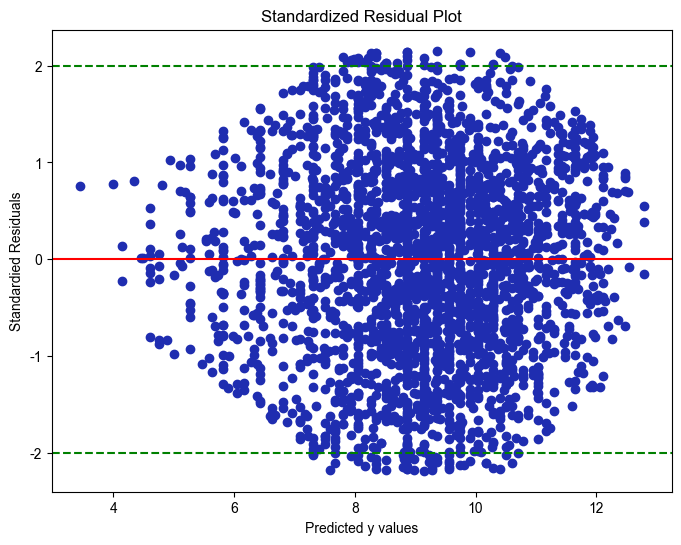

In [ ]:
# 去掉殘差與影響值過大的點

# Step 1：取得影響值與殘差
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
standard_resid = influence.resid_studentized_internal

# Step 2：設定門檻
cooks_thresh = 4 / len(filtered_df)
resid_thresh = 2 

# Step 3：留下正常觀測值
mask = (cooks_d < cooks_thresh) & (np.abs(standard_resid) < resid_thresh)
filtered_df = filtered_df[mask].copy()

# Step 4：重新建立模型
model = sm.ols('flattened_total_box_office ~ flattened_production_budget', data=filtered_df).fit()
print(model.summary())

# Step 5：繪製殘差圖
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_df, x='flattened_production_budget', y='flattened_total_box_office', scatter_kws={'alpha':0.5})
plt.title('Relationship between Flattened Box Office and Production Budget')
plt.xlabel('Flattened Production Budget')

plot_residuals(model)   